# Codebook  
**Authors:** Patriccolumn = AndhraPradeshGramPanchayat["Mandal"]
columnk Guo  
Documenting existing data files of DaanMatch with information about location, owner, "version", source etc.

In [1]:
import boto3
import pandas as pd
import numpy as np 
import os
from collections import Counter
import matplotlib.pyplot as plt
import statistics
import operator

In [2]:
client = boto3.client('s3')
resource = boto3.resource('s3')
my_bucket = resource.Bucket('my-bucket')

# Andhra_Pradesh_Gram_Panchayat

## TOC:
* [About this dataset](#1)
* [What's in this dataset](#2)
* [Codebook](#3)
    * [Missing values](#3.1)
    * [Summary statistics](#3.2)
* [Columns](#4)
    * [S. No.](#4.1)
    * [District](#4.2)
    * [Mandal](#4.3)
    * [Panchayat](#4.4)
    * [Gram Panchayat Special officer Name](#4.5)
    * [Mobile Number](#4.6)
    * [Address for Communication](#4.7)

**About this dataset**  <a class="anchor" id="1"></a>  
Data provided by: The Ministry of Panchayati Raj  
Source: https://www.panchayat.gov.in/documents/20126/75657/Andhra+Pradesh+Gram+Panchayat.xlsx/e1b39a3d-d726-fd91-68c8-3d7cd42755a4?t=1556532428214  
Last modified: May 29, 2021, 19:53:36 (UTC-07:00)
Size: 894.3 KB 

In [17]:
path = "s3://daanmatchdatafiles/DaanMatch_DataFiles/Andhra Pradesh Gram Panchayat.xlsx"
xl = pd.ExcelFile(path)
print(xl.sheet_names)
# Load sheet
AndhraPradeshGramPanchayat = xl.parse("Gram Panchayat")
# Reset index
AndhraPradeshGramPanchayat.head()

['Gram Panchayat']


,S. No.,District,Mandal,Panchayat,Gram Panchayat Special officer Name,Mobile Number,Address for Communication
0,1,Ananthapur,Ananthapur,A.Narayanapuram,Anwar Basha,9.496189e+09,Sarpanch\nA.Narayanapuram Gram Panchayat \nAt-...
1,2,Ananthapur,Ananthapur,Akuthotapalli,C Obulamma,9.490610e+09,Sarpanch\nAkuthotapalli Gram Panchayat \nAt- A...
2,3,Ananthapur,Ananthapur,Alamuru,SURESH,8.790998e+09,Sarpanch\nAlamuru Gram Panchayat \nAt- Alamuru...
3,4,Ananthapur,Ananthapur,Anantapur(R),H M Basha,9.703327e+09,Sarpanch\nAnantapur(R) Gram Panchayat \nAt- An...
4,5,Ananthapur,Ananthapur,Ankampalli,P Venkatesh Kumar,9.985021e+09,Sarpanch\nAnkampalli Gram Panchayat \nAt- Anka...


**What's in this dataset?** <a class="anchor" id="2"></a>

In [13]:
print("Shape:", AndhraPradeshGramPanchayat.shape)
print("Rows:", AndhraPradeshGramPanchayat.shape[0])
print("Columns:", AndhraPradeshGramPanchayat.shape[1])
print("Each row is a Gram Panchayat.")

Shape: (12918, 7)
Rows: 12918
Columns: 7
Each row is a Gram Panchayat.


In [15]:
AndhraPradeshGramPanchayat_columns = [column for column in AndhraPradeshGramPanchayat_df.columns]
AndhraPradeshGramPanchayat_columns

['S. No.',
 'District',
 'Mandal',
 'Panchayat',
 'Gram Panchayat Special officer Name',
 'Mobile Number',
 'Address for Communication']

**Codebook** <a class="anchor" id="3"></a>

In [23]:
AndhraPradeshGramPanchayat_columns = [column for column in AndhraPradeshGramPanchayat_df.columns]
AndhraPradeshGramPanchayat_description = ["Index",
                                          "District name",
                                          "Mandal (local government area)", 
                                          "Panchayat (village)", 
                                          "Name of Gram Panchayat special officer", 
                                          "Mobile Number", 
                                          "Communication Address"]
AndhraPradeshGramPanchayat_dtypes = [dtype for dtype in AndhraPradeshGramPanchayat_df.dtypes]

data = {"Column Name": AndhraPradeshGramPanchayat_columns, "Description": AndhraPradeshGramPanchayat_description, "Type": AndhraPradeshGramPanchayat_dtypes}
AndhraPradeshGramPanchayat_codebook = pd.DataFrame(data)
AndhraPradeshGramPanchayat_codebook

,Column Name,Description,Type
0,S. No.,Index,int64
1,District,District name,object
2,Mandal,Mandal (local government area),object
3,Panchayat,Panchayat (village),object
4,Gram Panchayat Special officer Name,Name of Gram Panchayat special officer,object
5,Mobile Number,Mobile Number,float64
6,Address for Communication,Communication Address,object


**Missing values** <a class="anchor" id="3.1"></a>

In [38]:
AndhraPradeshGramPanchayat.isnull().sum()

S. No.                                  0
District                                0
Mandal                                  0
Panchayat                               0
Gram Panchayat Special officer Name    17
Mobile Number                          21
Address for Communication               0
dtype: int64

**Summary statistics** <a class="anchor" id="3.2"></a>

Not applicable because all are qualitative values.

## Columns
<a class="anchor" id="4"></a>

### S. No.
<a class="anchor" id="4.1"></a>
Index

In [40]:
column = AndhraPradeshGramPanchayat["S. No."]
column

0            1
1            2
2            3
3            4
4            5
         ...  
12913    12914
12914    12915
12915    12916
12916    12917
12917    12918
Name: S. No., Length: 12918, dtype: int64

In [26]:
# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)

Duplicates: {}


### District
<a class="anchor" id="4.2"></a>
District name

In [69]:
column = AndhraPradeshGramPanchayat["District"]
column

0          Ananthapur
1          Ananthapur
2          Ananthapur
3          Ananthapur
4          Ananthapur
             ...     
12913    YSR District
12914    YSR District
12915    YSR District
12916    YSR District
12917    YSR District
Name: District, Length: 12918, dtype: object

In [70]:
print("Unique values:", column.unique())

# Number of empty strings/missing values
print("Invalid:", sum(column == " ") + sum(column.isnull()))

# Table of number of each class
counter = dict(Counter(column))
count = { key:[value] for key, value in counter.items()}
table = pd.DataFrame.from_dict(count)
table = table.melt(var_name="District", value_name="Count")
table

Unique values: ['Ananthapur' 'Chittoor' 'East Godavari' 'Guntur' 'Krishna' 'Kurnool'
 'Prakasam' 'SPSR Nellore' 'Srikakulam' 'Visakhapatnam' 'Vizianagaram'
 'West Godavari' 'YSR District']
Invalid: 0


,District,Count
0,Ananthapur,1003
1,Chittoor,1363
2,East Godavari,1069
3,Guntur,1011
4,Krishna,970
5,Kurnool,889
6,Prakasam,1028
7,SPSR Nellore,940
8,Srikakulam,1100
9,Visakhapatnam,925


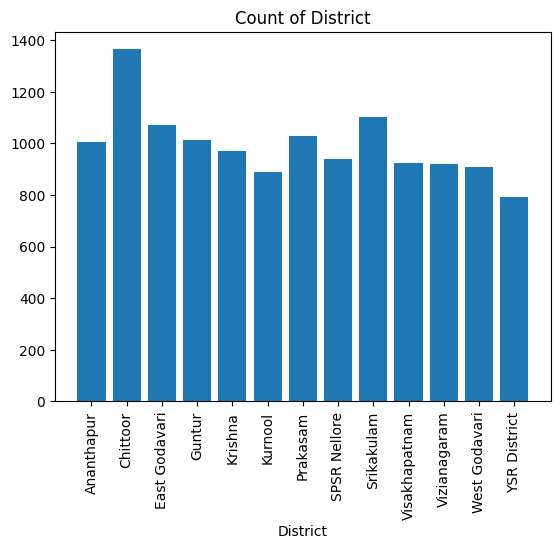

In [71]:
# Plot number of each class
plt.bar(table["District"], table["Count"])
plt.title("Count of District")
plt.xlabel("District")
plt.xticks(rotation = 90)
plt.show()

### Mandal
<a class="anchor" id="4.3"></a>
Mandal (local government area)

In [124]:
column = AndhraPradeshGramPanchayat["Mandal"]
column

0        Ananthapur
1        Ananthapur
2        Ananthapur
3        Ananthapur
4        Ananthapur
            ...    
12913    Vontimitta
12914    Vontimitta
12915    Vontimitta
12916    Vontimitta
12917    Vontimitta
Name: Mandal, Length: 12918, dtype: object

In [125]:
print("No. of unique values:", len(column.unique()))

# Number of empty strings/missing values
print("Invalid:", sum(column == " ") + sum(column.isnull()))

# Table of number of each class
counter = dict(Counter(column))
count = { key:[value] for key, value in counter.items()}
table = pd.DataFrame.from_dict(count)
table = table.melt(var_name="Mandal", value_name="Count").sort_values("Count", ascending = False)
table

No. of unique values: 648
Invalid: 0


,Mandal,Count
256,Gudur,59
275,Unguturu,54
177,Seethanagaram,51
76,Ramachandrapuram,48
423,Kondapuram,47
...,...,...
636,Gopavaram,7
322,Pagidyala,7
302,Maddikera East,7
94,Kurabalakota,6


In [126]:
# Summary Statistics
print("Max count:", table["Count"].max())
print("Min count:", table["Count"].min())
print("Mean count:", table["Count"].mean())
print("Median count:",table["Count"].median())
print("Mode count:", table["Count"].median())

Max count: 59
Min count: 6
Mean count: 19.935185185185187
Median count: 19.0
Mode count: 19.0


### Panchayat
<a class="anchor" id="4.4"></a>
Panchayat (village)

In [110]:
column = AndhraPradeshGramPanchayat["Panchayat"]
column

0        A.Narayanapuram
1          Akuthotapalli
2                Alamuru
3           Anantapur(R)
4             Ankampalli
              ...       
12913     Narvakatipalle
12914        Pennaperuru
12915     Rachagudipalle
12916            Salabad
12917         Vontimitta
Name: Panchayat, Length: 12918, dtype: object

In [111]:
print("No. of unique values:", len(column.unique()))

# Number of empty strings/missing values
print("Invalid:", sum(column == " ") + sum(column.isnull()))


# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:value for key, value in counter.items() if value > 1}
print("No. of Duplicates:", len(duplicates))


stats = {'a':1000, 'b':3000, 'c': 100}
max(stats.iteritems(), key=operator.itemgetter(1))[0]

No. of unique values: 10878
Invalid: 0
No. of Duplicates: 1112


In [117]:
# Example
AndhraPradeshGramPanchayat[AndhraPradeshGramPanchayat["Panchayat"] == "Alamuru"]

,S. No.,District,Mandal,Panchayat,Gram Panchayat Special officer Name,Mobile Number,Address for Communication
2,3,Ananthapur,Ananthapur,Alamuru,SURESH,8.790998e+09,Sarpanch\nAlamuru Gram Panchayat \nAt- Alamuru...
3019,3020,East Godavari,Alamuru,Alamuru,Sri P.BOJJI RAJU,9.618533e+09,Sarpanch\nAlamuru Gram Panchayat \nAt- Alamuru...
11807,11808,West Godavari,Penumantra,Alamuru,M.Srinivasa Rao,7.382633e+09,Sarpanch\nAlamuru Gram Panchayat \nAt- Alamuru...


Duplicate Panchayats do not refer to the same districts/mandals.

### Gram Panchayat Special officer Name
<a class="anchor" id="4.5"></a>
Name of Gram Panchayat special officer

In [118]:
column = AndhraPradeshGramPanchayat["Gram Panchayat Special officer Name"]
column

0                   Anwar Basha
1                    C Obulamma
2                        SURESH
3                     H M Basha
4          P Venkatesh Kumar   
                  ...          
12913          A.Venkata Prasad
12914                   Sirisha
12915    Sri G.Venkata Subbaiah
12916          A.Venkata Prasad
12917            Smt J.Sireesha
Name: Gram Panchayat Special officer Name, Length: 12918, dtype: object

In [120]:
print("No. of unique values:", len(column.unique()))

# Number of empty strings/missing values
print("Invalid:", sum(column == " ") + sum(column.isnull()))

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:value for key, value in counter.items() if value > 1}
print("No. of Duplicates:", len(duplicates))

No. of unique values: 5847
Invalid: 17
No. of Duplicates: 3636


In [123]:
duplicates
# Example
#AndhraPradeshGramPanchayat[AndhraPradeshGramPanchayat["Gram Panchayat Special officer Name"] == "Alamuru"]

{'C Obulamma': 2,
 'SURESH': 2,
 'H M Basha': 2,
 'P Venkatesh Kumar   ': 2,
 'A Nirmala Meri': 2,
 'PRASAD': 2,
 'E VENKATA SWAMY': 2,
 'M Narasaiah': 2,
 'HEMALATHA': 2,
 'J VASU PRAKASH': 2,
 'K Narasimha Reddy': 2,
 'M Siva Ramudu': 2,
 'P Sreenivasulu': 3,
 'A LOKESH BABU': 2,
 'P Musthaq Ahmed Khan': 2,
 'P Damodaraiah': 2,
 'B Chandrakala': 2,
 'D Peddanna': 2,
 'Smt Chennamma': 2,
 'Smt Vanisree': 3,
 'G Kalyani': 2,
 'Guru Prasad': 2,
 'A Suresh Kumar  ': 2,
 'K Damodaramma': 2,
 'c nagaraju': 2,
 'PSreenath Reddy': 2,
 ' K Tarachandranaik': 2,
 'S Rajyalakshmi': 2,
 'Nageswari': 2,
 'B V Sasikala': 2,
 'G Prabhu Kishor': 2,
 'P Vijayakumari': 2,
 'K Sarada': 4,
 'G Thippayya': 2,
 'M C Chandra prasad': 2,
 'K A Jalajakshi': 2,
 'M Venkataramudu': 2,
 'M Rajkumar': 2,
 'C N Munivelu ': 2,
 'K Hajivali': 2,
 'D Siddappa': 2,
 'RAMA KRISHNUDU BINGI': 2,
 'B Eramma': 2,
 'C Muralidhar': 4,
 'Shekshavali': 2,
 'SANKAR VADDE': 3,
 'KULLAYAPPA KORICHA': 3,
 'HARI PRASAD CHENNA': 2,


### Mobile Number
<a class="anchor" id="4.6"></a>
Mobile Number

### Address for Communication
<a class="anchor" id="4.7"></a>
Communication Address